## Model Building

### Table of Contents

#### [1. Import the relevant libraries](#1)
#### [2. Create the target variable](#2)
#### [3. Standardize the Data](#3)
#### [4. Train-Test Split](#4)
#### [5. Logistic  Regression](#5)
#### [6. Random Forest ](#6)
#### [7. Comparing Model Performance](#7)

### 1. Import the Relevant Libraries<a id=1></a>

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

### Load the Data

In [25]:
data_preprocessed = pd.read_csv("Preprocessed.csv")

In [26]:
data_preprocessed.head()

,reason_1,reason_2,reason_3,reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2


### 2. Create the target variable<a id=2></a>

In [27]:
data_preprocessed["Absenteeism Time in Hours"].median()

3.0

#### 3 is our threshold that separates our target variable  

We create two target variable which are **Moderately Absent** and **Excessively Absent**

In [28]:
targets = np.where(data_preprocessed["Absenteeism Time in Hours"] > 3, 1, 0)

In [31]:
targets[:5]

array([1, 0, 0, 1, 0])

In [32]:
data_preprocessed["Excessive Absenteeism"] = targets

In [33]:
data_preprocessed.head()

,reason_1,reason_2,reason_3,reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Excessive Absenteeism
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4,1
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2,0
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4,1
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2,0


In [38]:
round(data_preprocessed["Excessive Absenteeism"].sum() / data_preprocessed["Excessive Absenteeism"].shape[0],2)

0.46

#### % 46 of the target is 1,  it is a good sign for balanced data

In [39]:
data_with_target = data_preprocessed.drop(["Absenteeism Time in Hours"],axis = 1)

In [40]:
data_with_target is data_preprocessed

False

In [12]:
data_with_target.head()

,reason_1,reason_2,reason_3,reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Excessive Absenteeism
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,1
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,0
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,1
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,0


#### Creating input(independent variable dataset)

In [41]:
data_with_target.shape

(700, 15)

In [43]:
unscaled_inputs = data_with_target.iloc[:,:-1]

### 3. Standardize the Data

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()

In [46]:
unscaled_inputs.columns.values

array(['reason_1', 'reason_2', 'reason_3', 'reason_4', 'Month Value',
       'Day of the Week', 'Transportation Expense', 'Distance to Work',
       'Age', 'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets'], dtype=object)

In [47]:
columns_to_scale = ['Month Value',
       'Day of the Week', 'Transportation Expense', 'Distance to Work',
       'Age', 'Daily Work Load Average', 'Body Mass Index']
dummy_columns = ['reason_1', 'reason_2', 'reason_3', 'reason_4','Education']

In [48]:
input_scale = unscaled_inputs.loc[:,columns_to_scale]

In [49]:
scaled_input = scaler.fit_transform(input_scale)

In [51]:
new_inputs  =  pd.concat([unscaled_inputs.loc[:,dummy_columns],pd.DataFrame(columns = columns_to_scale,data = scaled_input)],axis = 1).values

### Split the data into train & test and shuffle

#### Import the relevant module

In [52]:
from sklearn.model_selection import train_test_split

### 4.Train-Test Split

In [53]:
x_train,x_test,y_train,y_test =train_test_split(new_inputs,targets,test_size = 0.2,random_state = 20)

In [54]:
print(x_train.shape,y_train.shape)

(560, 12) (560,)


In [55]:
print(x_test.shape,y_test.shape)

(140, 12) (140,)


### 5. Logistic Regression<a id=5></a>

In [56]:
from sklearn.linear_model import LogisticRegression

In [184]:
lr_model= LogisticRegression()

In [185]:
lr_model.fit(x_train,y_train)

LogisticRegression()

In [186]:
y_pred = lr_model.predict(x_test)

#### 5.1 Model Evaluation

In [60]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.78      0.74        74
           1       0.72      0.64      0.68        66

    accuracy                           0.71       140
   macro avg       0.72      0.71      0.71       140
weighted avg       0.72      0.71      0.71       140



In [61]:
print('Accuracy Score is {:.2f}'.format(accuracy_score(y_test,y_pred)))

Accuracy Score is 0.71


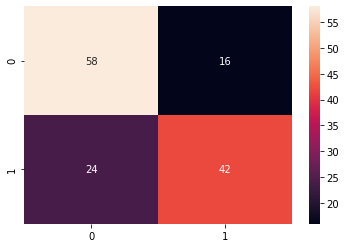

In [63]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True )

#### 5.2 Hyperparameter Tuning for Logistic Regression

In [187]:
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

In [189]:
lr_model_cv = GridSearchCV(lr_model,param_grid=param_grid,cv=3,n_jobs=2,verbose=1)

In [191]:
lr_model_cv.fit(x_train,y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  45 out of  45 | elapsed:    0.4s finished


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=2,
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])},
             verbose=1)

In [193]:
lr_model_cv_pred = lr_model_cv.predict(x_test)

In [196]:
print(classification_report(y_test,lr_model_cv_pred))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75        74
           1       0.73      0.67      0.70        66

    accuracy                           0.73       140
   macro avg       0.73      0.73      0.73       140
weighted avg       0.73      0.73      0.73       140



#### Model performance has improved by 2 % 

### 6. Support Vector Machine<a id=6></a>

In [64]:
from sklearn.svm import SVC

In [175]:
svc_model = SVC(C=1)

In [176]:
svc_model.fit(x_train,y_train)

SVC(C=1)

In [177]:
y_pred_svc = svc_model.predict(x_test)

#### 6.1 Model Evaluation

In [178]:
print('Accuracy Score is {:.2f}'.format(accuracy_score(y_test,y_pred_svc)))

Accuracy Score is 0.73


In [195]:
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75        74
           1       0.72      0.70      0.71        66

    accuracy                           0.73       140
   macro avg       0.73      0.73      0.73       140
weighted avg       0.73      0.73      0.73       140



#### 6.2. Hyperparamater Tuning for SVC

In [163]:
param_grid = {'C': [2,3,4,5,5.5], 
              'gamma': [0.05,0.06,0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 

In [164]:
from sklearn.model_selection import GridSearchCV

In [170]:
grid_model_svc = GridSearchCV(svc_model,param_grid=param_grid,cv=3,verbose=0,n_jobs=2)

In [171]:
grid_model_svc.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=SVC(C=1), n_jobs=2,
             param_grid={'C': [2, 3, 4, 5, 5.5],
                         'gamma': [0.05, 0.06, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [172]:
grid_pred_svc = grid_model_svc.predict(x_test)

In [173]:
grid_model_svc.best_estimator_

SVC(C=5, gamma=0.05)

In [174]:
print(classification_report(y_test,grid_pred_svc))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77        74
           1       0.75      0.73      0.74        66

    accuracy                           0.76       140
   macro avg       0.76      0.76      0.76       140
weighted avg       0.76      0.76      0.76       140



- **Our model has improved by 3 %**

### 7. Comparing Model Performance<a id=7></a>

We prepared our dataset and built model  with Logistic Regression and Support Vector Classifer.

As we see above Support Vector Classifier performs better

In [206]:
data={"Model":["Logistic Regression","Support Vector"],"Accuracy":[0.73,0.76] }

In [209]:
Accuracy = pd.DataFrame(data)
Accuracy

,Model,Accuracy
0,Logistic Regression,0.73
1,Support Vector,0.76
